**Experiment 2: Multivariate Linear Regression**

*What should your code do?:*
1. Display the regression coefficients for each of the three datasets.
2. Visualize the plot for the same.

*Further details,*
1. Closed-Form Solution: Using Standard Linear Regression Library
2. Optimization Algorithms: SGD (using SGDRegressor) and BGD (like Exp 1)

SGD Implementation: Using SGDRegressor from the Scikit-Learn Library

*Note:*
Perform both closed-form solutions and optimization algorithms for the data provided.


# **Closed Form Solution -** *Set1_Batch_25.csv*


In [1]:
#Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#Reading the datset and creating a dataframe
df = pd.read_csv("Set1_Batch_25.csv")
#print(df.ndim, df.shape)
#df.head()
x1 = df['x1']
x2 = df['x2']
y = df['y']
#x1.ndim, x1.shape

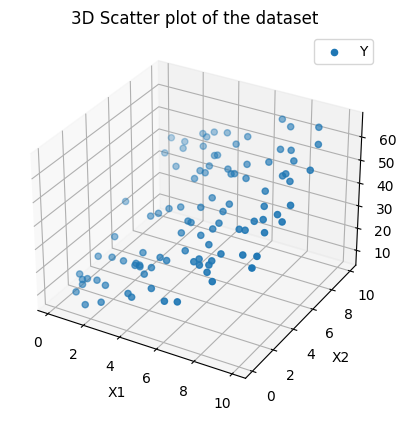

In [3]:
#Plotting the entire dataset
ax = plt.axes(projection ="3d")
ax.scatter3D(x1, x2, y)
plt.title("3D Scatter plot of the dataset")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.legend("Y")
plt.show()

In [4]:
#Splittig the datset into train and test data (80 percent train, 20 percent test)
X = df[['x1','x2']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


X.ndim, X.shape
X_train.ndim, X_test.ndim, y_train.ndim, y_test.ndim
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 2), (20, 2), (80,), (20,))

In [5]:
#Fitting the train data into the regression model
regr = LinearRegression()
regr.fit(X_train, y_train)
#print(regr.score(X_test,y_test))

LinearRegression()

In [6]:
#Accessing the coefficent and intercept
intercept = regr.intercept_
coefficient = regr.coef_
print(f"Plane is of the form y = {intercept} + ({coefficient[0]} * x1) + ({coefficient[1]} * x2)")
print(f"Theta0/Intercept: {intercept} \nTheta1/Coefficient: {coefficient[0]} \nTheta2/Coefficient: {coefficient[1]}")

Plane is of the form y = 2.000000000000014 + (2.999999999999999 * x1) + (3.9999999999999982 * x2)
Theta0/Intercept: 2.000000000000014 
Theta1/Coefficient: 2.999999999999999 
Theta2/Coefficient: 3.9999999999999982


In [7]:
#Converting 2D dataframe to 1D array for plotting since scatter plot only takes arrays
#x1_train_plot = np.array(X_train[['x1']]).flatten()
#x2_train_plot = np.array(X_train[['x2']]).flatten()

x1_test_plot = np.array(X_test[['x1']]).flatten()
x2_test_plot = np.array(X_test[['x2']]).flatten()
x1_test_plot.ndim, x1_test_plot.shape

(1, (20,))

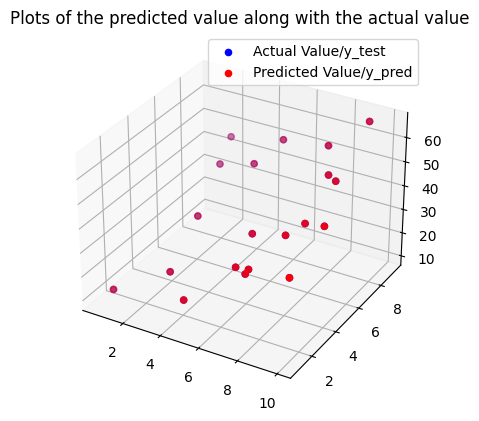

In [8]:
#Plotting the results (Best fit of the data)
y_pred = regr.predict(X_test)
ax1 = plt.axes(projection="3d")
ax1.scatter3D(x1_test_plot,x2_test_plot,y_test, color = "blue")
ax1.scatter3D(x1_test_plot,x2_test_plot,y_pred, color ="red")
#ax1.scatter3D(x1_train_plot,x2_train_plot,y_train, color ="green")
plt.title("Plots of the predicted value along with the actual value")
plt.legend(["Actual Value/y_test","Predicted Value/y_pred"])

In [9]:
#Mean-Squared Error
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
print("Mean Squared Error: ",mse)

Mean Squared Error:  3.407879110554771e-29


# **Optimization Algorithms -** *Set1_Batch_25.csv*

In [10]:
#Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy import linalg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [11]:
#Reading the datset and creating a dataframe
df = pd.read_csv("Set1_Batch_25.csv")
#print(df.ndim, df.shape)
#df.head()
x1 = df['x1']
x2 = df['x2']
y = df['y']
#x1.ndim, x1.shape

In [12]:
#Splittig the datset into train and test data (80 percent train, 20 percent test)
X = df[['x1','x2']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


X.ndim, X.shape
X_train.ndim, X_test.ndim, y_train.ndim, y_test.ndim
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 2), (20, 2), (80,), (20,))

In [13]:
theta_init = np.zeros((3,1))
learning_rate=0.01
epochs = 100
threshold = 1e-3

In [14]:
temp_array = np.ones(X_train.shape[0])
temp_array_2 = np.ones(X_test.shape[0])
temp_array.reshape(-1,1)
temp_array_2.reshape(-1,1)
X_train_with_ones = np.column_stack((temp_array,X_train))
X_test_with_ones = np.column_stack((temp_array_2,X_test))
#X_test_with_ones.ndim, X_test_with_ones.shape

y_train_bgd = np.array(y_train).reshape(-1,1)
y_test_bgd = np.array(y_test).reshape(-1,1)

X_train_with_ones.shape, X_test_with_ones.shape, y_train_bgd.shape, y_test_bgd.shape

((80, 3), (20, 3), (80, 1), (20, 1))

In [15]:
def cost_function(X,y,theta):
  m = len(y)
  y_hat = np.dot(X,theta)
  temp = np.square(y_hat-y)
  J = (1/m)*np.sum(temp)

  return J

#temp = cost_function(X_train_with_ones,y_train_bgd,theta_init)
#temp.shape, y_train_bgd.shape

In [16]:
def gradient(X,y,theta):
  m = len(y)

  X_transpose = np.transpose(X)
  y_hat = np.dot(X,theta)
  temp1 = np.dot(X_transpose,y_hat-y)
  grad = (1/m)*temp1

  return grad

temp = gradient(X_train_with_ones,y_train_bgd,theta_init)
print(X_train_with_ones.shape,y_train_bgd.shape,theta_init.shape,temp.shape)

(80, 3) (80, 1) (3, 1) (3, 1)


In [17]:
def batch_gradient_descent(X,y,theta_init,learning_rate,epochs,threshold):
  m = len(y)
  theta = theta_init.copy()
  J_history = np.zeros(epochs)

  for i in range(epochs):
    theta_old = theta
    for j in range(m):
      X_i = np.array(X[j,:]).reshape(1,-1)
      y_i = np.array(y[j,:]).reshape(1,-1)
      grad = gradient(X_i,y_i,theta)
      theta = theta - learning_rate*grad
      if linalg.norm(grad)<=threshold:
        J_history[i] = cost_function(X,y,theta)
        break
    J_history[i] = cost_function(X,y,theta)

  return theta, J_history

In [18]:
sgd_regressor = SGDRegressor()
sgd_regressor.fit(X_train,y_train)

SGDRegressor()

In [19]:
theta_bgd, J_history_bgd = batch_gradient_descent(X_train_with_ones,y_train_bgd,theta_init,learning_rate,epochs,threshold)

In [20]:
#Accessing the coefficent and intercept
intercept = sgd_regressor.intercept_
coefficient = sgd_regressor.coef_
print(f"Plane is of the form y = {intercept} + ({coefficient[0]} * x1) + ({coefficient[1]} * x2)")
print(f"Theta0/Intercept: {intercept} \nTheta1/Coefficient: {coefficient[0]} \nTheta2/Coefficient: {coefficient[1]}")

Plane is of the form y = [1.50796259] + (3.052605889146556 * x1) + (4.038244246274355 * x2)
Theta0/Intercept: [1.50796259] 
Theta1/Coefficient: 3.052605889146556 
Theta2/Coefficient: 4.038244246274355


In [21]:
#Accessing the coefficent and intercept
print(f"Plane is of the form y = {theta_bgd[0]} + ({theta_bgd[1]} * x1) + ({theta_bgd[2]} * x2)")
print(f"Theta0/Intercept: {theta_bgd[0]} \nTheta1/Coefficient: {theta_bgd[1]} \nTheta2/Coefficient: {theta_bgd[2]}")

Plane is of the form y = [1.99822398] + ([3.00022865] * x1) + ([4.00011796] * x2)
Theta0/Intercept: [1.99822398] 
Theta1/Coefficient: [3.00022865] 
Theta2/Coefficient: [4.00011796]


In [22]:
#Converting 2D dataframe to 1D array for plotting since scatter plot only takes arrays
x1_test_plot = np.array(X_test[['x1']]).flatten()
x2_test_plot = np.array(X_test[['x2']]).flatten()
x1_test_plot.ndim, x1_test_plot.shape

(1, (20,))

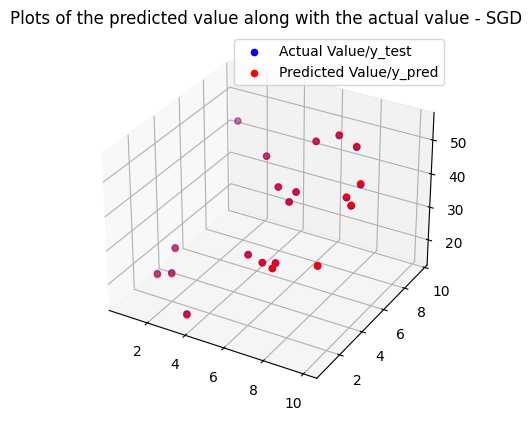

In [23]:
#Plotting the results for SGD(Best fit of the data)
y_pred = sgd_regressor.predict(X_test)
ax1 = plt.axes(projection="3d")
ax1.scatter3D(x1_test_plot,x2_test_plot,y_test, color = "blue")
ax1.scatter3D(x1_test_plot,x2_test_plot,y_pred, color ="red")
#ax1.scatter3D(x1_train_plot,x2_train_plot,y_train, color ="green")
plt.title("Plots of the predicted value along with the actual value - SGD")
plt.legend(["Actual Value/y_test","Predicted Value/y_pred"])

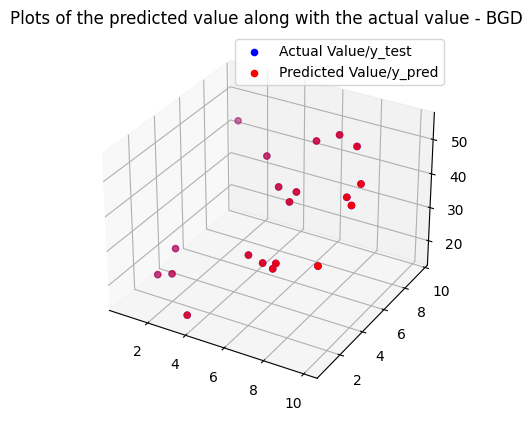

In [24]:
#Plotting the results for BGD(Best fit of the data)
y_pred_bgd = np.dot(X_test_with_ones,theta_bgd)
ax2 = plt.axes(projection="3d")
ax2.scatter3D(x1_test_plot,x2_test_plot,y_test, color = "blue")
ax2.scatter3D(x1_test_plot,x2_test_plot,y_pred_bgd, color ="red")
plt.title("Plots of the predicted value along with the actual value - BGD")
plt.legend(["Actual Value/y_test","Predicted Value/y_pred"])

In [25]:
#Mean-Squared Error
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
print("Mean Squared Error(SGD): ",mse)

Mean Squared Error(SGD):  0.030893954270308333


In [26]:
mse_bgd = mean_squared_error(y_true=y_test,y_pred=y_pred_bgd)
print("Mean Squared Error(BGD): ",mse_bgd)

Mean Squared Error(BGD):  5.300973571001021e-07
